### 1. 데이터 리모델링과 처리

- 주어진 데이터를 pandas DataFrame으로 만들고, groupby 기능을 이용해 Year별 총 Sales를 구하세요.
- 구한 결과를 바탕으로, Year별 총 매출을 Total_Sales라는 새로운 컬럼으로 추가한 DataFrame을 출력하세요.

**데이터:**

| Year | Quarter | Sales |
|---|---|---|
| 2023 | Q1 | 200 |
| 2023 | Q2 | 300 |
| 2023 | Q3 | 250 |


---


### 2. 정형 데이터와 비정형 데이터 처리

**[정형 데이터 처리]**

- 주어진 데이터를 DataFrame으로 만들고, Age가 30세 이상(>= 30), Salary가 5만 이상(>= 50000)인 직원만 필터링한 DataFrame을 만드세요.
- 필터링된 결과에서, 직원의 Name, Age, Department 컬럼만 출력하세요(또는 필요한 컬럼만).

**데이터:**

data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [25, 32, 45, 29, 40],
    "Department": ["HR", "Finance", "IT", "Marketing", "IT"],
    "Salary": [48000, 52000, 60000, 45000, 70000]
}



**[비정형 데이터 처리]**

- API에서 JSON 데이터를 가져와 DataFrame으로 변환 후 아래 필드를 추출해 새로운 DataFrame을 만드세요.
    - id → ID
    - name → Name
    - username → Username
    - email → Email
    - address.city → City
    - company.name → Company
- City가 "Lebsackbury" 또는 "Roscoeview"에 해당하는 사용자만 필터링하세요.
- 필터링된 DataFrame을 CSV 파일로 저장하세요.

**API:** `https://jsonplaceholder.typicode.com/users`


---


### 3. 시각화 및 시계열 데이터 활용

- 아래 데이터를 pandas와 matplotlib를 사용해 시계열 그래프로 시각화하세요.
- X축은 날짜, Y축은 가격으로 설정하고, 가격의 추세를 선 그래프로 나타내세요.

**데이터:**

| Date | Price |
|---|---|
| 2023-01-01 | 100 |
| 2023-02-01 | 120 |
| 2023-03-01 | 130 |
| 2023-04-01 | 125 |
| 2023-05-01 | 140 |


---
---


### 1번 문제

In [185]:
import pandas as pd
data = {'year':[2023, 2023, 2023],
        'quarter':['Q1','Q2','Q3'],
        'sales':[200, 300, 250]}
df = pd.DataFrame(data)
df_grouped = df.groupby('year')['sales'].sum()
# transform('sum')을 사용할 수도 있다.
df['Total_sales'] = pd.Series(df_grouped[df['year']].values)
df

,year,quarter,sales,Total_sales
0,2023,Q1,200,750
1,2023,Q2,300,750
2,2023,Q3,250,750


## 2-1번 문제

In [178]:
import pandas as pd
data = { "ID": [1, 2, 3, 4, 5],
        "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
         "Age": [25, 32, 45, 29, 40],
         "Department": ["HR", "Finance", "IT", "Marketing", "IT"],
         "Salary": [48000, 52000, 60000, 45000, 70000] }

df = pd.DataFrame(data)
df_filtered = df[(df['Age']>=30) & (df['Salary']>=50000)]
df_filtered[['Name', 'Age', 'Department']]

,Name,Age,Department
1,Bob,32,Finance
2,Charlie,45,IT
4,Eve,40,IT


## 2-2번 문제

In [183]:
import pandas as pd

path = "https://jsonplaceholder.typicode.com/users"
data = pd.read_json(path)
print(data.columns)
df = pd.DataFrame({
    'ID':data['id'],
    'Name':data['name'],
    'Username':data['username'],
    'Email':data['email'],
    'City':list(map(lambda x: x['city'], data['address'])),
    'Company':list(map(lambda x: x['name'], data['company']))
})

df_filtered = df[df['City'].isin(["Lebsackbury","Roscoeview"])]
df_filtered.to_csv('/content/3weeks_df.csv')
df_filtered

Index(['id', 'name', 'username', 'email', 'address', 'phone', 'website',
       'company'],
      dtype='object')


,ID,Name,Username,Email,City,Company
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,Roscoeview,Keebler LLC
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,Lebsackbury,Hoeger LLC


## 3번 문제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5 non-null      datetime64[ns]
 1   Price   5 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 212.0 bytes
None


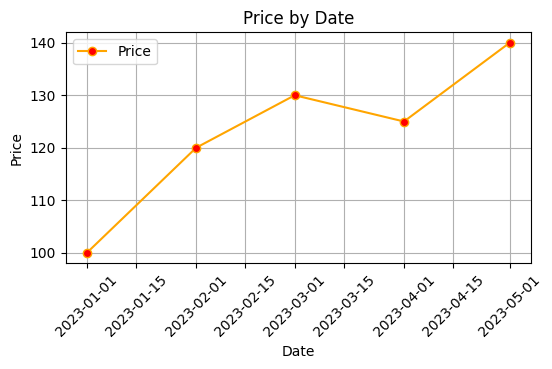

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Date': pd.to_datetime(['2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01']),
    'Price': [100, 120, 130, 125, 140]
})
print(df.info())
plt.figure(figsize = (6, 3))
plt.plot(df['Date'],df['Price'], marker = 'o', color = 'orange', markerfacecolor='red')
#
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price by Date')
plt.legend(['Price'])
#
plt.grid(True)
plt.xticks(rotation=45)
plt.show()